# Weather Data Analysis

This notebook analyzes temperature data from a weather dataset, focusing on monthly comparisons and statistical analysis.

## 1. Load and Prepare Data

First, we'll import the necessary libraries and load the dataset from the provided URL.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv"
df = pd.read_csv(url)

# Convert date column to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())
print("\nDataset information:")
display(df.info())

First few rows of the dataset:


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datum                2601 non-null   datetime64[ns]
 1   Bewoelkung           2591 non-null   float64       
 2   Temperatur           2601 non-null   float64       
 3   Windgeschwindigkeit  2601 non-null   int64         
 4   Wettercode           1932 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 101.7 KB


None

## 2. Calculate Overall Average Temperature

Let's calculate the overall average temperature across the entire dataset.

In [2]:
# Calculate overall average temperature
overall_avg_temp = df['Temperatur'].mean()

print(f"Overall average temperature: {overall_avg_temp:.2f}°C")

# Display some basic statistics about temperature
print("\nBasic temperature statistics:")
display(df['Temperatur'].describe())

Overall average temperature: 12.10°C

Basic temperature statistics:


count    2601.000000
mean       12.099586
std         7.174357
min       -10.250000
25%         6.512500
50%        12.000000
75%        17.825000
max        32.671428
Name: Temperatur, dtype: float64

## 3. Calculate Average Temperature for July

Now let's analyze the temperatures specifically for the month of July.

In [3]:
# Filter data for July
july_data = df[df['Datum'].dt.month == 7]

# Calculate average temperature for July
july_avg_temp = july_data['Temperatur'].mean()

print(f"Average temperature in July: {july_avg_temp:.2f}°C")

# Display detailed statistics for July
print("\nDetailed statistics for July temperatures:")
display(july_data['Temperatur'].describe())

Average temperature in July: 20.75°C

Detailed statistics for July temperatures:


count    247.000000
mean      20.751142
std        3.666991
min       14.000000
25%       17.718750
50%       20.125000
75%       23.418750
max       31.287500
Name: Temperatur, dtype: float64

## 4. Compare July and May Temperatures

Let's perform a statistical comparison between July and May temperatures to see if there's a significant difference.

In [4]:
# Filter data for May
may_data = df[df['Datum'].dt.month == 5]

# Calculate average temperature for May
may_avg_temp = may_data['Temperatur'].mean()

print(f"Average temperature in May: {may_avg_temp:.2f}°C")
print(f"Average temperature in July: {july_avg_temp:.2f}°C")
print(f"Temperature difference (July - May): {(july_avg_temp - may_avg_temp):.2f}°C")

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(july_data['Temperatur'], may_data['Temperatur'])

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nThe difference in temperatures between July and May is statistically significant (p < 0.05)")
else:
    print("\nThe difference in temperatures between July and May is not statistically significant (p >= 0.05)")

Average temperature in May: 15.24°C
Average temperature in July: 20.75°C
Temperature difference (July - May): 5.51°C

t-statistic: 15.9371
p-value: 0.0000

The difference in temperatures between July and May is statistically significant (p < 0.05)


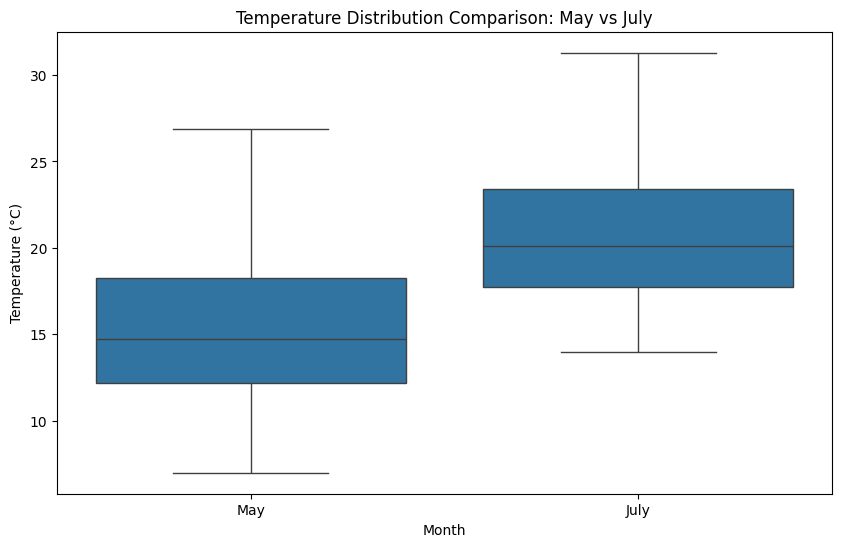

In [5]:
# Create a box plot to visualize the temperature distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(
    pd.DataFrame({
        'May': may_data['Temperatur'],
        'July': july_data['Temperatur']
    })
))
plt.title('Temperature Distribution Comparison: May vs July')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

## Additional plots: 2013-07-01 to 2019-07-30

Filter the weather data to the period 2013-07-01 through 2019-07-30 and create three plots:

- Scatter plot: date vs temperature
- Histogram: temperature distribution
- Bar chart: average temperature per year (2013–2019)

In [6]:
# Filter to requested period
start = pd.to_datetime('2013-07-01')
end = pd.to_datetime('2019-07-30')
df_period = df[(df['Datum'] >= start) & (df['Datum'] <= end)].copy()

print('Filtered rows:', len(df_period))
print('Date range in filtered data:', df_period['Datum'].min(), 'to', df_period['Datum'].max())

df_period['year'] = df_period['Datum'].dt.year

df_period.head()

Filtered rows: 2205
Date range in filtered data: 2013-07-01 00:00:00 to 2019-07-30 00:00:00


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,year
394,2013-07-01,6.0,17.8375,15,20.0,2013
395,2013-07-02,3.0,17.3125,10,NaN,2013
396,2013-07-03,7.0,21.0750,6,61.0,2013
397,2013-07-04,7.0,18.8500,7,20.0,2013
398,2013-07-05,5.0,19.9750,12,NaN,2013


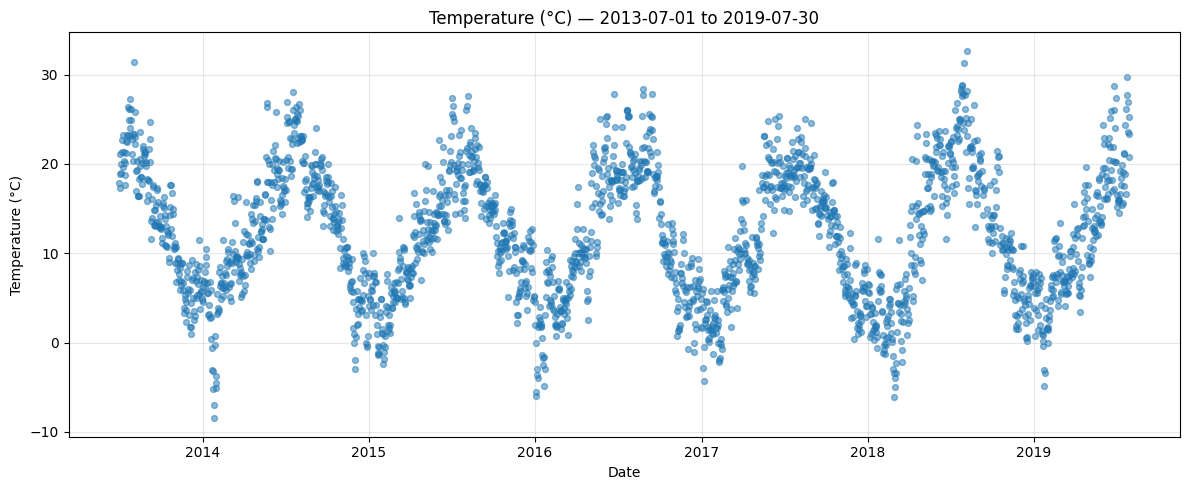

In [7]:
# 1) Scatter plot: date vs temperature
plt.figure(figsize=(12,5))
plt.scatter(df_period['Datum'], df_period['Temperatur'], alpha=0.5, s=18)
plt.title('Temperature (°C) — 2013-07-01 to 2019-07-30')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

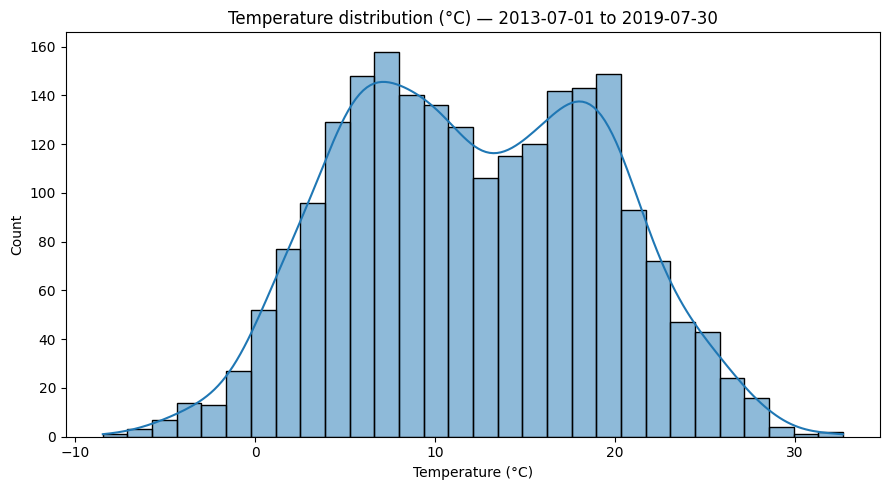

In [8]:
# 2) Histogram: temperature distribution
plt.figure(figsize=(9,5))
sns.histplot(df_period['Temperatur'].dropna(), bins=30, kde=True)
plt.title('Temperature distribution (°C) — 2013-07-01 to 2019-07-30')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipykernel_30763/2242150822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_year, x='year', y='Temperatur', palette='coolwarm')


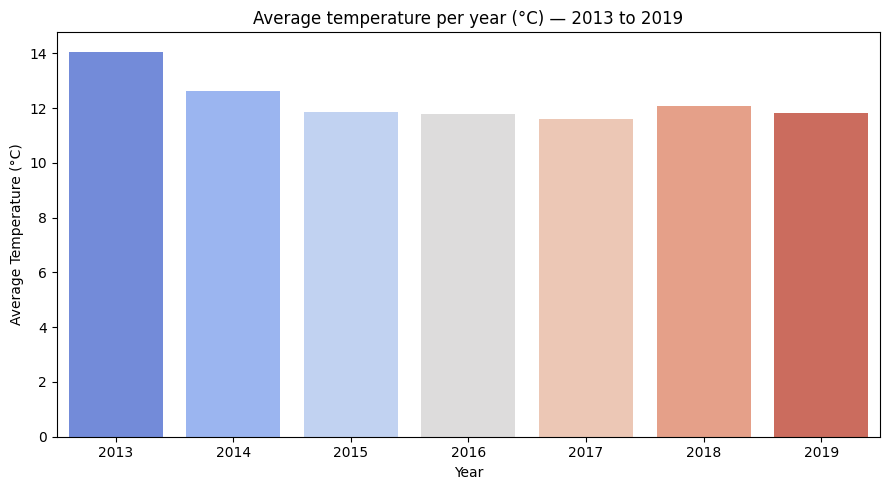

 year  Temperatur
 2013   14.063587
 2014   12.613659
 2015   11.857877
 2016   11.770157
 2017   11.606075
 2018   12.069255
 2019   11.833813


In [9]:
# 3) Bar chart: average temperature per year
by_year = df_period.groupby('year')['Temperatur'].mean().reset_index()
plt.figure(figsize=(9,5))
sns.barplot(data=by_year, x='year', y='Temperatur', palette='coolwarm')
plt.title('Average temperature per year (°C) — 2013 to 2019')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

# Display the numeric values
print(by_year.to_string(index=False))

## Filter period 2013-07-01 to 2019-07-30 — compute averages

We'll filter the loaded `df` to the requested period and compute three summary variables:

- Average cloud cover (`Bewoelkung`)
- Average temperature (`Temperatur`)
- Average wind speed (`Windgeschwindigkeit`)

The code cell below performs the filtering and prints the results.

In [10]:
# Filter the dataset to the requested period and compute averages
start = '2013-07-01'
end = '2019-07-30'

mask = (df['Datum'] >= pd.to_datetime(start)) & (df['Datum'] <= pd.to_datetime(end))
df_period = df.loc[mask].copy()

print(f"Filtered rows: {len(df_period)} (from {start} to {end})")

avg_cloud = df_period['Bewoelkung'].mean()
avg_temp = df_period['Temperatur'].mean()
avg_wind = df_period['Windgeschwindigkeit'].mean()

print(f"Average cloud cover (Bewoelkung): {avg_cloud:.4f}")
print(f"Average temperature (Temperatur): {avg_temp:.4f} °C")
print(f"Average wind speed (Windgeschwindigkeit): {avg_wind:.4f} ")

# show a quick descriptive summary
display(df_period[['Bewoelkung','Temperatur','Windgeschwindigkeit']].describe())

Filtered rows: 2205 (from 2013-07-01 to 2019-07-30)
Average cloud cover (Bewoelkung): 4.7253
Average temperature (Temperatur): 12.1426 °C
Average wind speed (Windgeschwindigkeit): 11.0717 


,Bewoelkung,Temperatur,Windgeschwindigkeit
count,2195.000000,2205.000000,2205.000000
mean,4.725285,12.142617,11.071655
std,2.647073,7.206376,4.139068
min,0.000000,-8.475000,3.000000
25%,3.000000,6.375000,8.000000
50%,6.000000,11.750000,10.000000
75%,7.000000,18.000000,13.000000
max,8.000000,32.671428,35.000000


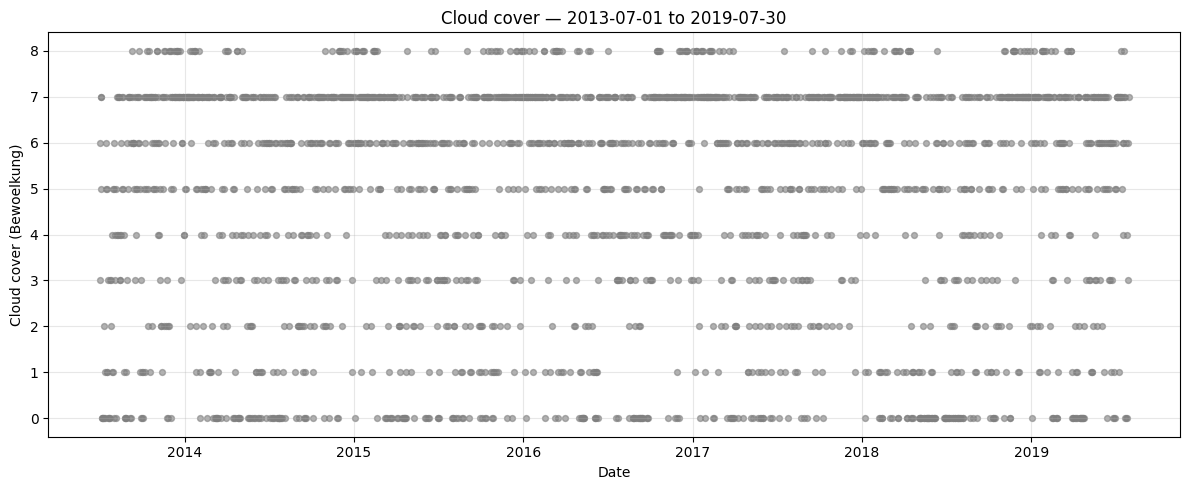

In [11]:
# Cloud cover: 1) Scatter plot (date vs cloud cover)
plt.figure(figsize=(12,5))
plt.scatter(df_period['Datum'], df_period['Bewoelkung'], alpha=0.6, s=18, color='tab:gray')
plt.title('Cloud cover — 2013-07-01 to 2019-07-30')
plt.xlabel('Date')
plt.ylabel('Cloud cover (Bewoelkung)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

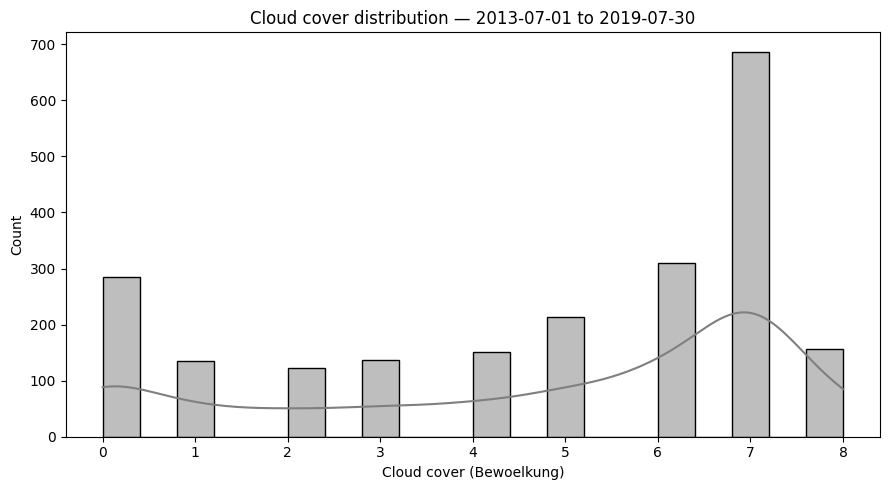

In [12]:
# Cloud cover: 2) Histogram (distribution)
plt.figure(figsize=(9,5))
sns.histplot(df_period['Bewoelkung'].dropna(), bins=20, kde=True, color='tab:gray')
plt.title('Cloud cover distribution — 2013-07-01 to 2019-07-30')
plt.xlabel('Cloud cover (Bewoelkung)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipykernel_30763/1425250799.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=by_year_cloud, x='year', y='Bewoelkung', color='tab:gray', ci=None)


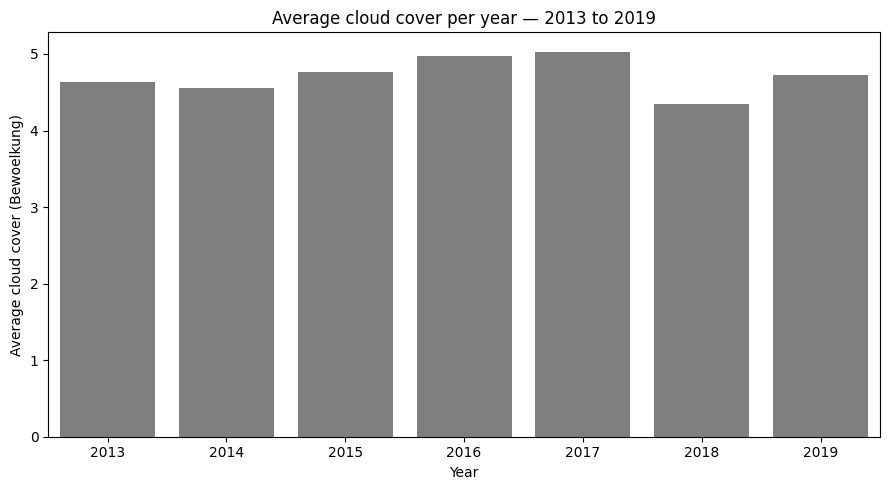

 year  Bewoelkung
 2013    4.635870
 2014    4.561644
 2015    4.767123
 2016    4.967123
 2017    5.031161
 2018    4.342776
 2019    4.723810


In [14]:
# Cloud cover: 3) Average cloud cover per year (bar chart)
df_period['year'] = df_period['Datum'].dt.year
by_year_cloud = df_period.groupby('year')['Bewoelkung'].mean().reset_index()
plt.figure(figsize=(9,5))
sns.barplot(data=by_year_cloud, x='year', y='Bewoelkung', color='tab:gray', ci=None)
plt.title('Average cloud cover per year — 2013 to 2019')
plt.xlabel('Year')
plt.ylabel('Average cloud cover (Bewoelkung)')
plt.tight_layout()
plt.show()

print(by_year_cloud.to_string(index=False))

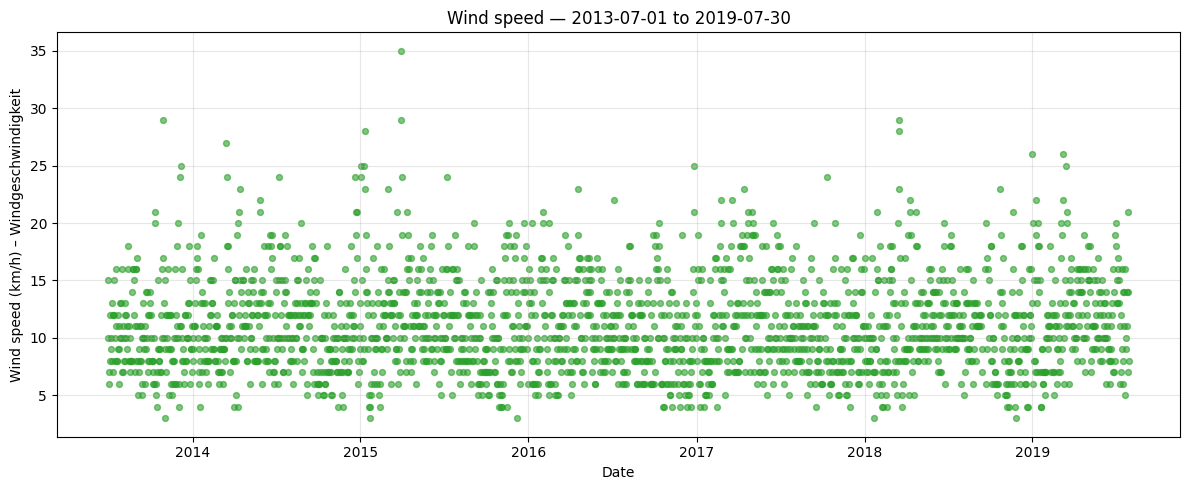

In [15]:
# Wind speed: 1) Scatter plot (date vs wind speed)
plt.figure(figsize=(12,5))
plt.scatter(df_period['Datum'], df_period['Windgeschwindigkeit'], alpha=0.6, s=18, color='tab:green')
plt.title('Wind speed — 2013-07-01 to 2019-07-30')
plt.xlabel('Date')
plt.ylabel('Wind speed (km/h) – Windgeschwindigkeit')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

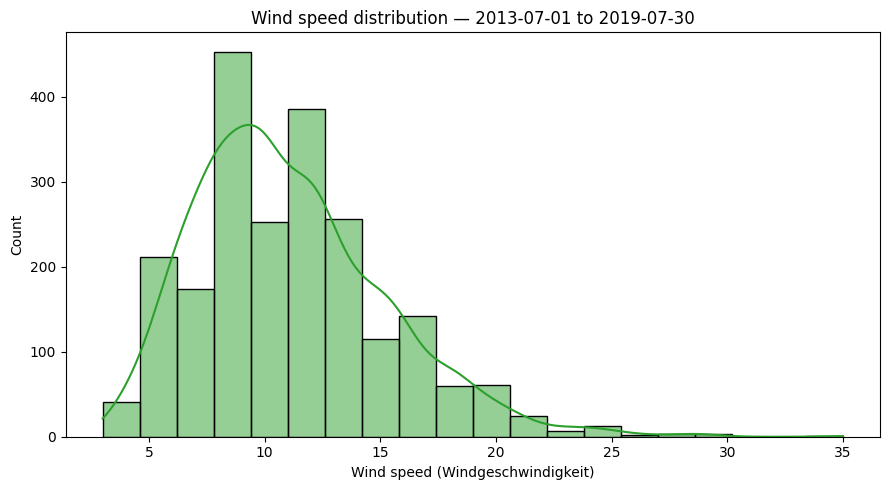

In [16]:
# Wind speed: 2) Histogram (distribution)
plt.figure(figsize=(9,5))
sns.histplot(df_period['Windgeschwindigkeit'].dropna(), bins=20, kde=True, color='tab:green')
plt.title('Wind speed distribution — 2013-07-01 to 2019-07-30')
plt.xlabel('Wind speed (Windgeschwindigkeit)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Exercise Week 3: Data Merging

This notebook demonstrates how to import and merge data from three CSV files:
- umsatzdaten_gekuerzt.csv (Sales data)
- kiwo.csv (Calendar week data)
- wetter.csv (Weather data)

We'll combine these datasets into a single Pandas DataFrame for further analysis.

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Set figure size for all plots
plt.rcParams['figure.figsize'] = [12, 6]

## Load Individual CSV Files

Let's start by loading each CSV file into a separate DataFrame. We'll make sure to parse dates appropriately where needed.

In [19]:
# Load sales data
sales_df = pd.read_csv('data/umsatzdaten_gekuerzt.csv', parse_dates=['Datum'])
print("Sales data shape:", sales_df.shape)
display(sales_df.head())

# Load calendar week data
kiwo_df = pd.read_csv('data/kiwo.csv', parse_dates=['Datum'])
print("\nCalendar week data shape:", kiwo_df.shape)
display(kiwo_df.head())

# Load weather data
weather_df = pd.read_csv('data/wetter.csv', parse_dates=['Datum'])
print("\nWeather data shape:", weather_df.shape)
display(weather_df.head())

Sales data shape: (9334, 4)


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754



Calendar week data shape: (72, 2)


,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1



Weather data shape: (2601, 5)


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


## Data Preprocessing

Before merging the DataFrames, let's ensure that:
1. All date columns are in the same format
2. Any missing values are properly handled
3. Column names are consistent across datasets

In [20]:
# Check for missing values in each dataset
print("Missing values in sales data:")
print(sales_df.isnull().sum())
print("\nMissing values in calendar week data:")
print(kiwo_df.isnull().sum())
print("\nMissing values in weather data:")
print(weather_df.isnull().sum())

# Ensure date columns are properly formatted
for df in [sales_df, kiwo_df, weather_df]:
    df['Datum'] = pd.to_datetime(df['Datum'])
    
# Display data types of columns in each DataFrame
print("\nData types in sales_df:")
print(sales_df.dtypes)
print("\nData types in kiwo_df:")
print(kiwo_df.dtypes)
print("\nData types in weather_df:")
print(weather_df.dtypes)

Missing values in sales data:
id             0
Datum          0
Warengruppe    0
Umsatz         0
dtype: int64

Missing values in calendar week data:
Datum          0
KielerWoche    0
dtype: int64

Missing values in weather data:
Datum                    0
Bewoelkung              10
Temperatur               0
Windgeschwindigkeit      0
Wettercode             669
dtype: int64

Data types in sales_df:
id                      int64
Datum          datetime64[ns]
Warengruppe             int64
Umsatz                float64
dtype: object

Data types in kiwo_df:
Datum          datetime64[ns]
KielerWoche             int64
dtype: object

Data types in weather_df:
Datum                  datetime64[ns]
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit             int64
Wettercode                    float64
dtype: object


## Merge DataFrames

Now we'll merge the three DataFrames using the 'Datum' column as the key. We'll use:
1. First merge calendar week data with sales data
2. Then merge the result with weather data
3. Use appropriate merge type to keep all relevant data

In [21]:
# First merge: sales data with calendar week data
merged_df = pd.merge(sales_df, kiwo_df, on='Datum', how='left')
print("Shape after first merge:", merged_df.shape)

# Second merge: add weather data
final_df = pd.merge(merged_df, weather_df, on='Datum', how='left')
print("Shape after second merge:", final_df.shape)

# Display the first few rows of the merged DataFrame
display(final_df.head())

# Check for any missing values in the final DataFrame
print("\nMissing values in merged DataFrame:")
print(final_df.isnull().sum())

Shape after first merge: (9334, 5)
Shape after second merge: (9334, 9)


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN



Missing values in merged DataFrame:
id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
KielerWoche            9111
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
dtype: int64


## Validate Merged Data

Let's verify that our merged DataFrame:
1. Contains all expected columns
2. Has the correct number of rows
3. Maintains data integrity from all source files

In [22]:
# Display information about the final DataFrame
print("Final DataFrame Info:")
print(final_df.info())

# Verify all columns are present
print("\nColumns in final DataFrame:")
print(final_df.columns.tolist())

# Basic statistics of numeric columns
print("\nSummary statistics:")
display(final_df.describe())

# Verify date range
print("\nDate range in merged data:")
print("Start date:", final_df['Datum'].min())
print("End date:", final_df['Datum'].max())
print("Number of unique dates:", final_df['Datum'].nunique())

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9334 non-null   int64         
 1   Datum                9334 non-null   datetime64[ns]
 2   Warengruppe          9334 non-null   int64         
 3   Umsatz               9334 non-null   float64       
 4   KielerWoche          223 non-null    float64       
 5   Bewoelkung           9264 non-null   float64       
 6   Temperatur           9318 non-null   float64       
 7   Windgeschwindigkeit  9318 non-null   float64       
 8   Wettercode           7009 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 656.4 KB
None

Columns in final DataFrame:
['id', 'Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

Summary statistics

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,9.334000e+03,9334,9334.000000,9334.000000,223.0,9264.000000,9318.000000,9318.000000,7009.000000
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,1.0,4.720747,12.028483,10.974780,36.900128
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,1.0,0.000000,-8.475000,3.000000,0.000000
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,1.0,3.000000,6.237500,8.000000,10.000000
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,1.0,7.000000,17.962500,13.000000,61.000000
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,1.0,8.000000,31.437500,35.000000,95.000000
std,1.512503e+05,NaN,1.489002,144.545189,0.0,2.646273,7.232829,4.131974,27.095884



Date range in merged data:
Start date: 2013-07-01 00:00:00
End date: 2018-07-31 00:00:00
Number of unique dates: 1819


## Descriptive Statistics and Visualizations

Let's analyze our merged dataset with:
1. Summary statistics for numerical variables
2. Time series analysis of sales
3. Weather impact visualization
4. Calendar week patterns

,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,9.334000e+03,9334.000000,9334.000000,223.0,9264.000000,9318.000000,9318.000000,7009.000000
mean,1.559311e+06,3.088172,206.749044,1.0,4.720747,12.028483,10.974780,36.900128
std,1.512503e+05,1.489002,144.545189,0.0,2.646273,7.232829,4.131974,27.095884
min,1.307011e+06,1.000000,7.051201,1.0,0.000000,-8.475000,3.000000,0.000000
25%,1.410123e+06,2.000000,96.897441,1.0,3.000000,6.237500,8.000000,10.000000
50%,1.601102e+06,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000
75%,1.704223e+06,4.000000,280.644663,1.0,7.000000,17.962500,13.000000,61.000000
max,1.807315e+06,6.000000,1879.461831,1.0,8.000000,31.437500,35.000000,95.000000
skew,-5.436700e-03,0.076324,1.832015,0.0,-0.633342,0.013104,0.939830,0.020252
kurtosis,-1.090064e+00,-1.176467,8.017525,0.0,-1.020989,-0.787287,1.442867,-1.506407


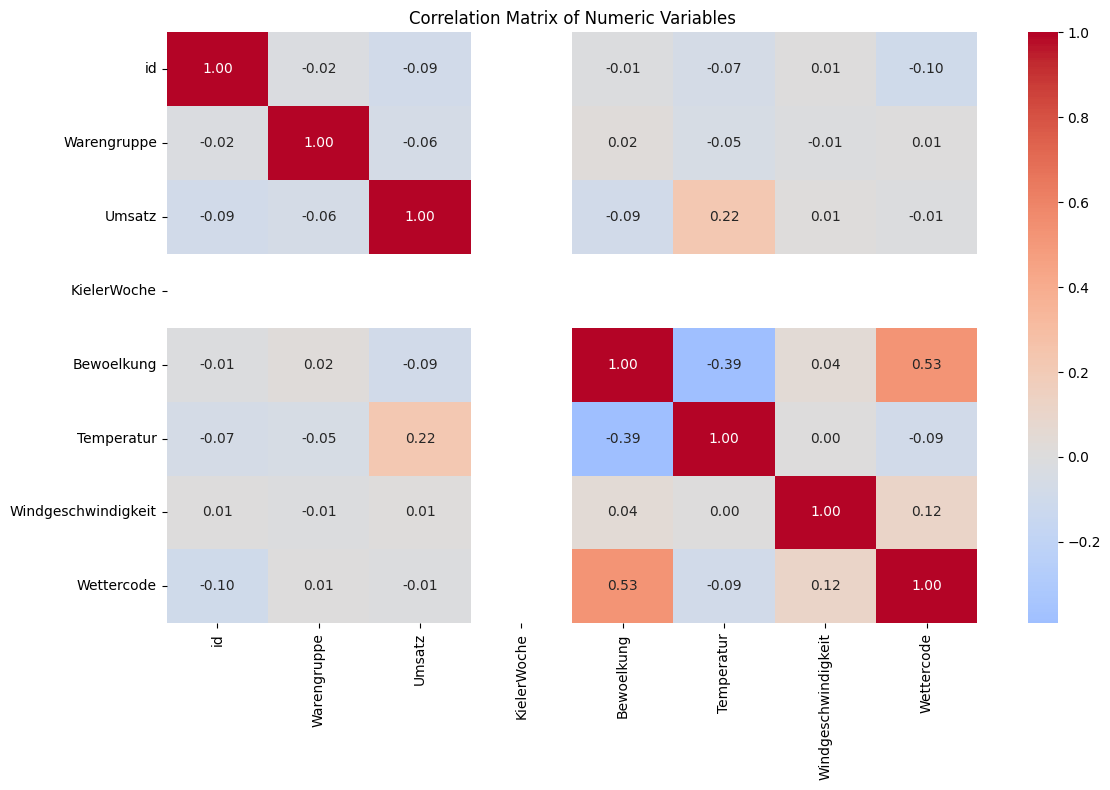

In [23]:
# Create a summary of numeric columns with more detailed statistics
numeric_stats = final_df.describe(include=[np.number])
numeric_stats.loc['skew'] = final_df.select_dtypes(include=[np.number]).skew()
numeric_stats.loc['kurtosis'] = final_df.select_dtypes(include=[np.number]).kurtosis()
display(numeric_stats)

# Calculate correlations between numeric variables
correlation_matrix = final_df.select_dtypes(include=[np.number]).corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

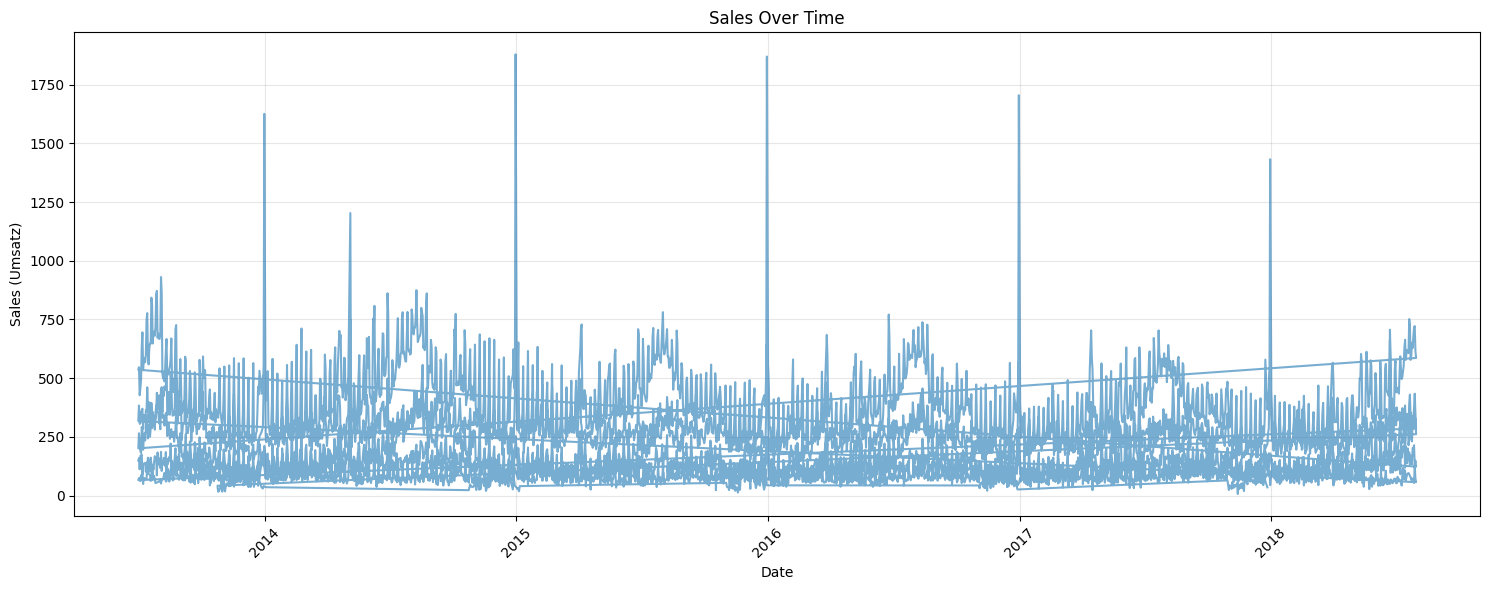

/tmp/ipykernel_30763/4077609359.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = final_df.set_index('Datum')['Umsatz'].resample('M').mean()


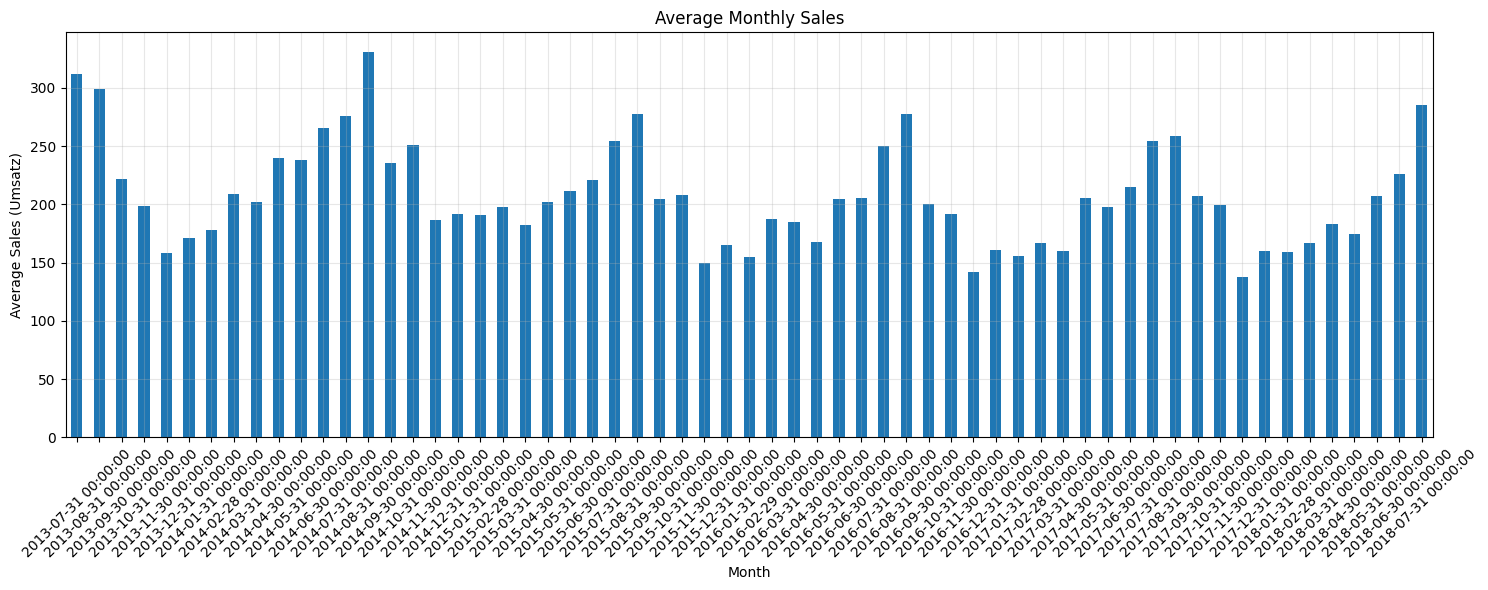

In [24]:
# Time series analysis of sales
plt.figure(figsize=(15, 6))
plt.plot(final_df['Datum'], final_df['Umsatz'], alpha=0.6)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Umsatz)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and plot monthly average sales
monthly_sales = final_df.set_index('Datum')['Umsatz'].resample('M').mean()
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales (Umsatz)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_30763/2355150591.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


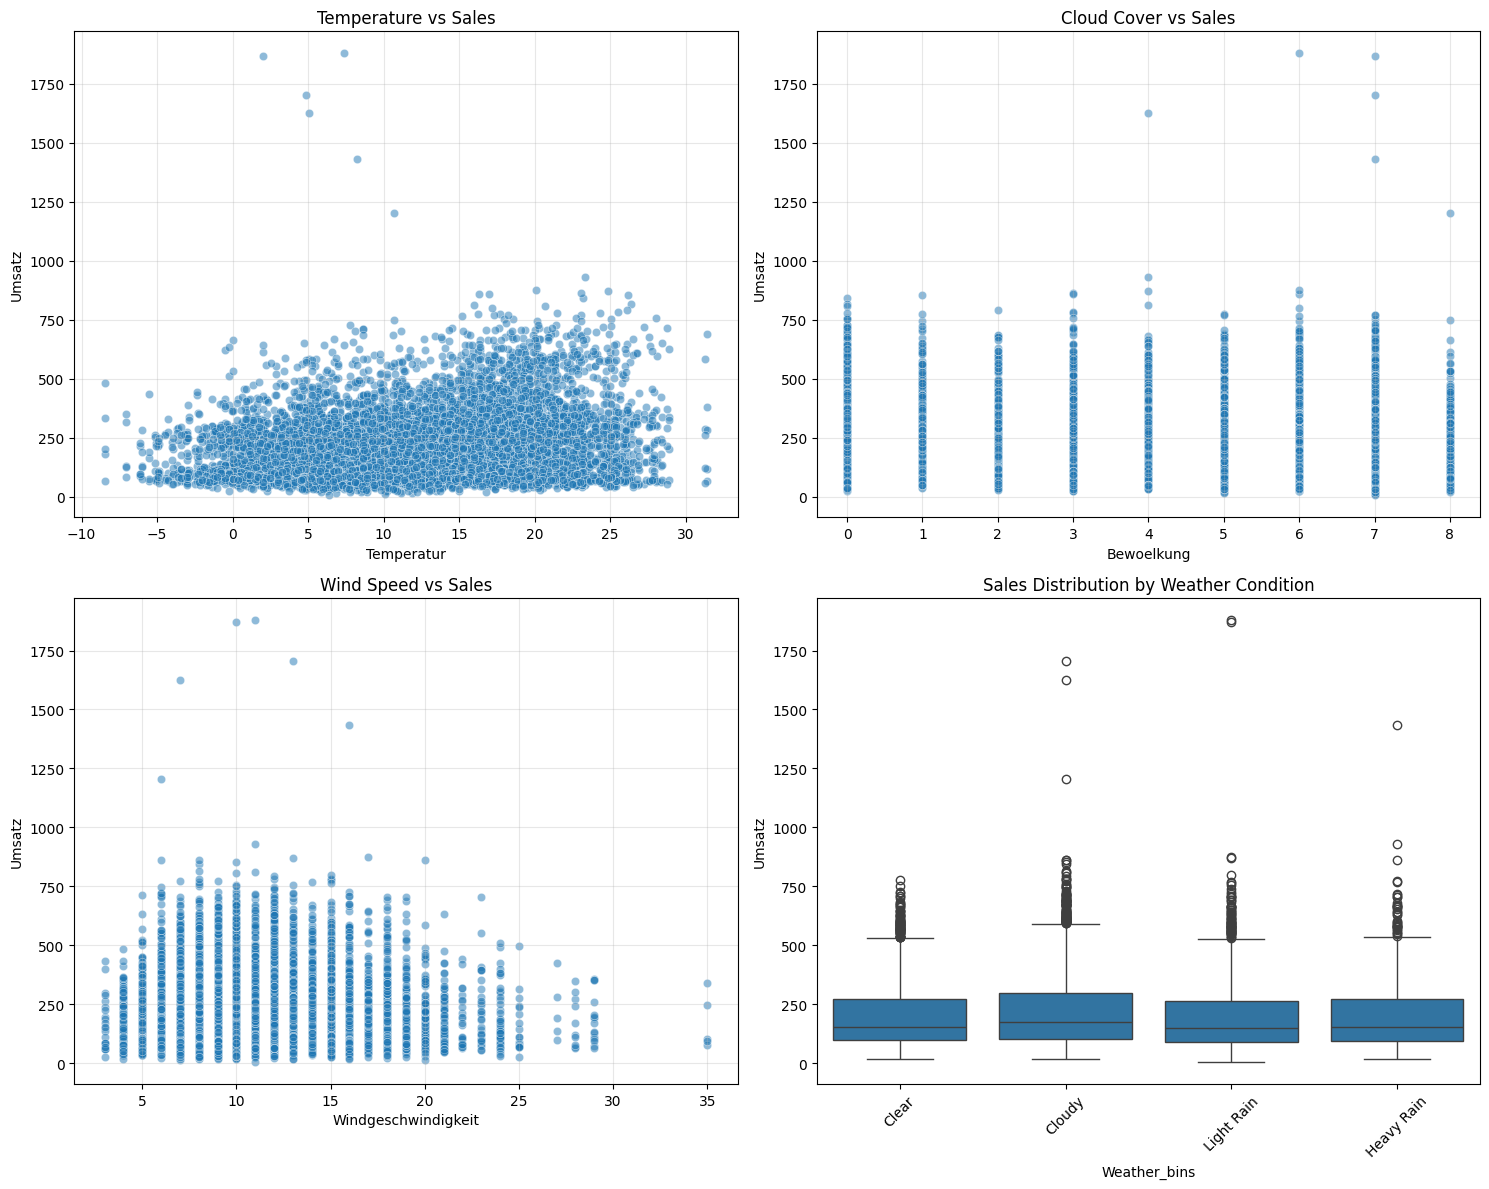

In [25]:
# Weather impact analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Temperature vs Sales
sns.scatterplot(data=final_df, x='Temperatur', y='Umsatz', alpha=0.5, ax=axes[0,0])
axes[0,0].set_title('Temperature vs Sales')
axes[0,0].grid(True, alpha=0.3)

# Cloud Cover vs Sales
sns.scatterplot(data=final_df, x='Bewoelkung', y='Umsatz', alpha=0.5, ax=axes[0,1])
axes[0,1].set_title('Cloud Cover vs Sales')
axes[0,1].grid(True, alpha=0.3)

# Wind Speed vs Sales
sns.scatterplot(data=final_df, x='Windgeschwindigkeit', y='Umsatz', alpha=0.5, ax=axes[1,0])
axes[1,0].set_title('Wind Speed vs Sales')
axes[1,0].grid(True, alpha=0.3)

# Box plot of sales by weather code (binned)
final_df['Weather_bins'] = pd.qcut(final_df['Wettercode'].fillna(final_df['Wettercode'].median()), 
                                 q=4, 
                                 labels=['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])
sns.boxplot(data=final_df, x='Weather_bins', y='Umsatz', ax=axes[1,1])
axes[1,1].set_title('Sales Distribution by Weather Condition')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

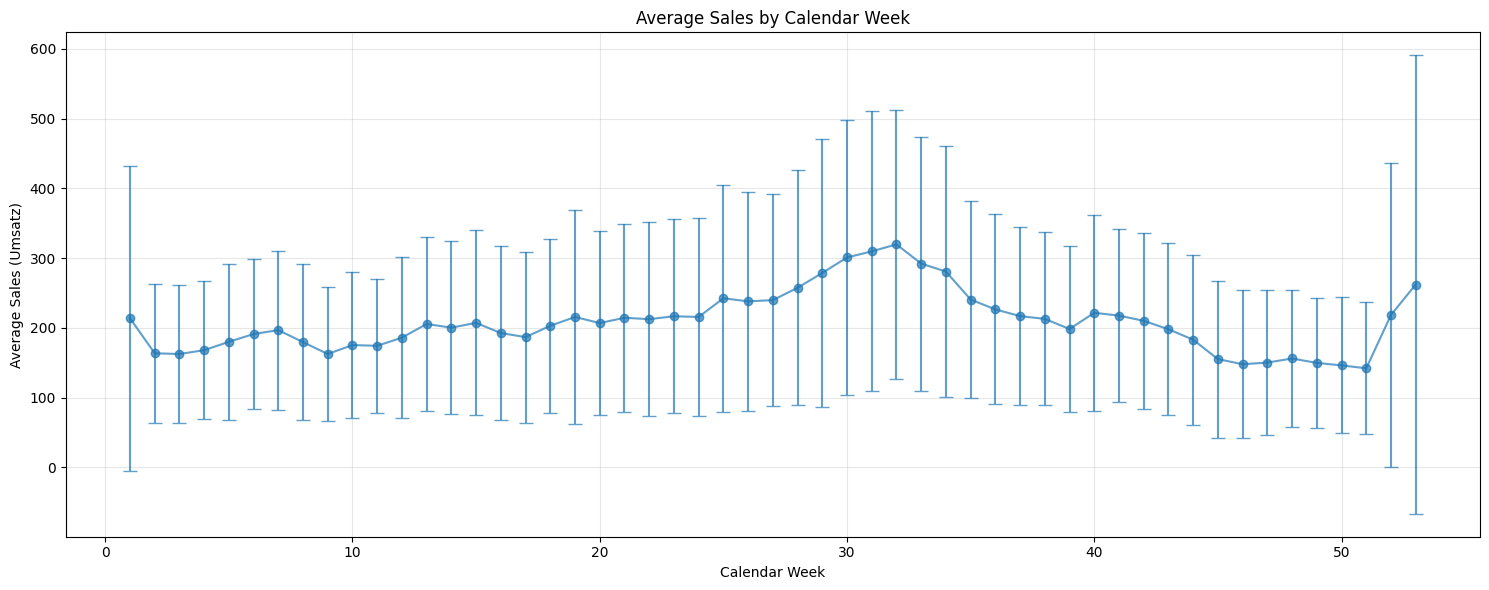

,Calendar Week,Average Sales,Standard Deviation
0,1,214.00,218.80
1,2,163.51,99.86
2,3,162.47,99.11
3,4,167.92,99.10
4,5,179.99,111.61
5,6,191.10,107.97
6,7,196.78,114.14
7,8,179.47,111.40
8,9,162.52,96.17
9,10,175.32,104.66


In [26]:
# Calendar week patterns
plt.figure(figsize=(15, 6))

# Extract calendar week from date
final_df['Kalenderwoche'] = final_df['Datum'].dt.isocalendar().week

# Calculate average sales by calendar week
weekly_sales = final_df.groupby('Kalenderwoche')['Umsatz'].agg(['mean', 'std']).reset_index()

# Plot average sales by calendar week with error bars
plt.errorbar(weekly_sales['Kalenderwoche'], 
            weekly_sales['mean'], 
            yerr=weekly_sales['std'], 
            fmt='o-', 
            alpha=0.7,
            capsize=5)

plt.title('Average Sales by Calendar Week')
plt.xlabel('Calendar Week')
plt.ylabel('Average Sales (Umsatz)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a summary table of sales by calendar week
weekly_summary = weekly_sales.round(2)
weekly_summary.columns = ['Calendar Week', 'Average Sales', 'Standard Deviation']
display(weekly_summary)

## Key Findings

The visualizations and analysis reveal several interesting patterns in the data:

1. **Temperature-Sales Relationship**
   - There appears to be a slight positive correlation between temperature and sales
   - Higher temperatures tend to be associated with somewhat increased sales activity

2. **Seasonal Patterns**
   - Sales show some seasonality in the monthly averages
   - Clear variations in sales levels across different months of the year

3. **Weather Impact**
   - Weather conditions seem to have some impact on sales patterns
   - Cloud cover and weather codes show relationships with sales performance

4. **Weekly Variations**
   - There's considerable variation in sales across different calendar weeks
   - Some weeks consistently show higher or lower sales levels than others

These insights could be valuable for:
- Inventory planning based on weather forecasts
- Staffing adjustments for seasonal variations
- Marketing strategy optimization based on weather conditions
- Revenue forecasting considering seasonal patterns